In [1]:
using Plots

# Creating function for the Integration(Simpson):

In [2]:
#simpson integration for the function
function integrate_(f,a,b)         
    n=length(f)-1
    h=(b-a)/n
    I= h/3*(f[1]+2*sum(f[3:2:end-2])+4*sum(f[2:2:end])+f[end])
    return I
end

integrate_ (generic function with 1 method)

# Creating the function for the despersion measure due to large scale structure(LSS)

In [3]:
#dispersion measure DM of a FRB at the sky position 𝒙.This is caused by the free electrons along the line of sight. 
#These electrons are either associated with the host halo, with the Milky Way, or with the large-scale structure (LSS).

function DM_for_LSS(Z,H0)
c=3e8                        #speed of light               
G=6.6743e-11                 #Gravitational constant
Omega_b=0.054               # parameter for representing baryon density 
Omega_m=0.315                #parameter for representing sum of dark and baryonic 
Xe=0.88                      #A constant including the factor of primordial hydrogen and helium abundances
fIGM=0.84                   #The fraction of electrons in the IGM, alculated by subtracting the fraction bound 
                            #in stars
mp=1.67e-27                 # Mass of the proton 
    
dz=0.00001                  
z=0:dz:Z                    # Representing the redshift interval 
    
#DM – redshift relation due to large scale structure
integrand = @. (1+z)/sqrt((1+z)^3*Omega_m + 1-Omega_m) 
intg=integrate_(integrand,0,Z)                                          
coeff=3*c*H0*Omega_b*Xe*fIGM*3.2404e-20/(8*pi*G*mp)             
return coeff*intg*3.24e-23                                 
end


DM_for_LSS (generic function with 1 method)

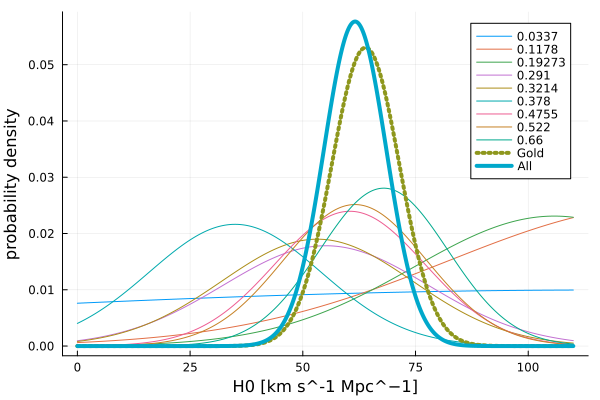

Hubble constant For Gold : 63.9
Hubble constant For All : 61.6


In [4]:
## An array storing the redshift(cm) at different FRB ##
Z=[0.0337,0.1178,0.19273,0.291,0.3214,0.378,0.4755,0.522,0.66] 

## An array storing the Dispersion measure observed ##
DM=[348.81,338.75,558.3,363.63,361.426,321.42,589.273,593.14,760.86]

## An array storing the dispersion measure due to milky way(observed) ##
MWDM=[199,37.2,188,57.3,40.5,57.8,102,56.4,37]

## H0 representing the interval of hubble constant ##
H0=0:0.1:110

LIKELI=ones(length(H0))
p=plot()

## An array for storing the the likelihood for different redshift(z) ##
Likelihood=[]

## An arry for storing the uncertanity for individual redshift(z) ##
Sig=[]


for i=1:9
    z=Z[i]
    lss(H0)=DM_for_LSS(z,H0)
    tot_DM=DM[i]
    mw_DM=MWDM[i]

    host_DM=100/(1+z) #mean value
    sigma_lss=40+140*z #in pc/cm^3
    sigma_mw=30
    sigma_host=50/(1+z) #in pc/cm^3
    sigma=sqrt(sigma_lss^2+sigma_mw^2+sigma_host^2)
    global Sig=append!(Sig,sigma)
    L(H0) = exp(-(tot_DM-mw_DM-host_DM-lss(H0))^2/(2*sigma^2))/sqrt(2*pi*sigma^2)
    l=@. L(H0)
    Likelihood=push!(Likelihood,l)
    plot!(p,H0,l/integrate_(l,0,110),label=z)  
end
Gold=Likelihood[3].*Likelihood[4].*Likelihood[5].*Likelihood[7].*Likelihood[8].*Likelihood[9]

##  Plotting the joint likelihood  ##
plot!(p,H0,Gold/integrate_(Gold,0,110),linewidth=4,linestyle=:dot,label="Gold")                       
All=Likelihood[1].*Likelihood[2].*Likelihood[3].*Likelihood[4].*Likelihood[5].*Likelihood[6].*Likelihood[7].*Likelihood[8].*Likelihood[9]
plot!(p,H0,All/integrate_(All,0,110),linewidth=4,label="All") 
xlabel!("H0 [km s^-1 Mpc^−1]")
ylabel!("probability density")
display(p)
#xlims!(0.3,110)
println("Hubble constant For Gold : ",H0[argmax(Gold)])
println("Hubble constant For All : ",H0[argmax(All)])

# The deviation of observed DM from the best fit of theoretical DM

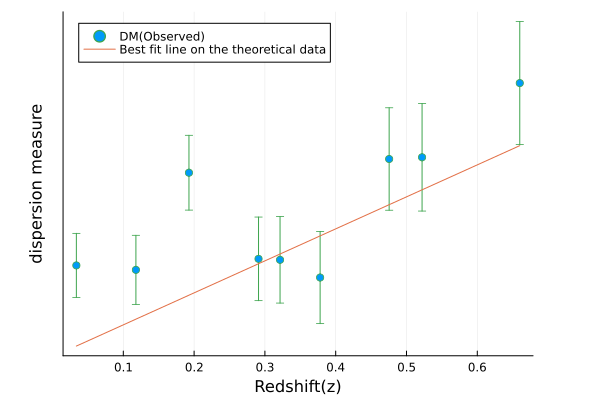

In [5]:
sigma_y = Sig
host_DM=100 ./(1 .+Z)
y = DM_for_LSS.(Z,61.6).+MWDM
Ly=length(y)
Y=y
x =Z
A=hcat(ones(length(x)),x)
C=zeros(Ly,Ly)
for i in 1:Ly
    C[i,i]=sigma_y[i]
end
X=(inv(A'*inv(C)*A))*(A'*inv(C)*Y)
scatter(Z,DM, xerr=0 , yerr = sigma_y, msc = 3, label = "DM(Observed)", ytick = 0:2:12)
plot!(x, X[2]*x.+X[1],label="Best fit line on the theoretical data",xlabel="Redshift(z)",ylabel="dispersion measure",left_margin = 10Plots.mm, right_margin = 15Plots.mm)
# xlabel!("Redshift(z)")
# ylabel!("DM[PC/cm^3]")
